In [88]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('/home/kirill/Projects/nir')
sys.path.append('/home/kirilman/Projects/nir/nir/')
import myutils
import sequence_generator as generator
import numpy as np
import matplotlib.pylab as plt
from pomegranate import *
from myutils import frequency_occurrence
%matplotlib inline
plt.rcParams.update({'font.size': 18})
plt.rcParams.update({'figure.figsize':[18,6]})

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [157]:
def get_anomal():
    alpha = ['a','b','c']
    N = 500
    signal_1 = generator.Sequence(N,alpha, type = 'continue',
                                  params={'a': {'len': [20, 20], 'depend_on': False},
                                          'c': {'len': [30, 30], 'depend_on': False},                                       
                                          'b': {'len': [20, 20], 'depend_on': False},
                                          'd': {'len': [45, 45], 'depend_on': False},
                                          'e': {'len': [15, 15], 'depend_on': False}
                                         },     mean = [1,10, 3, 2] ,
                                               variance = [1.25, 1.25, 1.25, 0.1, 0.14]).sequence

    signal_2 = generator.Sequence(N,alpha, type = 'continue',
                                   params={'a': {'len': [20, 20], 'depend_on': False},
                                           'c': {'len': [30, 30], 'depend_on': False},
                                           'b': {'len': [20, 20], 'depend_on': False},
                                           'd': {'len': [45, 45], 'depend_on': False},
                                           'e': {'len': [15, 15], 'depend_on': False},
                                     },     mean = [10,15,2,4] , 
                                            variance = [0.5, 0.5, 0.5, 0.1, 0.14]).sequence

    signal_3 = generator.Sequence(N,alpha, type = 'continue',
                                   params={'a': {'len': [20, 20], 'depend_on': False},
                                           'c': {'len': [30, 30], 'depend_on': False},
                                           'b': {'len': [20, 20 ], 'depend_on': False},
                                           'd': {'len': [45, 45], 'depend_on': False},
                                           'e': {'len': [15, 15], 'depend_on': False},
                                     },     mean = [12, 15, 13,7] , 
                                            variance = [0.5,0.5, 1, 0.1, 0.14]).sequence
    test = [signal_1, signal_2, signal_3]
    # signal = np.array([signal_1, signal_2, signal_3]).T
    signal = []
    for a,b,c in zip(signal_1,signal_2,signal_3):
        signal += [[a,b,c]]
    return signal
anomal = get_anomal()

In [165]:
alpha = ['a','b','c']
N = 500
signal_1 = generator.Sequence(N,alpha, type = 'continue',
                              params={'a': {'len': [30, 30], 'depend_on': False},
                                      'c': {'len': [15, 15], 'depend_on': False},                                       
                                      'b': {'len': [20, 20], 'depend_on': False},
                                      'd': {'len': [45, 45], 'depend_on': False},
                                      'e': {'len': [15, 15], 'depend_on': False}
                                     },     mean = [1,10, 3, 2] ,
                                            variance = [1.25, 1.25, 1.25, 0.1, 0.14]).sequence

signal_2 = generator.Sequence(N,alpha, type = 'continue',
                               params={'a': {'len': [30, 30], 'depend_on': False},
                                       'c': {'len': [15,  15], 'depend_on': False},
                                       'b': {'len': [20,20 ], 'depend_on': False},
                                       'd': {'len': [45, 45], 'depend_on': False},
                                       'e': {'len': [15, 15], 'depend_on': False},
                                 },     mean = [10,15,2,4] , 
                                        variance = [0.5, 0.5, 0.5, 0.1, 0.14]).sequence

signal_3 = generator.Sequence(N,alpha, type = 'continue',
                               params={'a': {'len': [30, 30], 'depend_on': False},
                                       'c': {'len': [15, 15], 'depend_on': False},
                                       'b': {'len': [20, 20 ], 'depend_on': False},
                                       'd': {'len': [45, 45], 'depend_on': False},
                                       'e': {'len': [15, 15], 'depend_on': False},
                                 },     mean = [12, 15, 13,7] , 
                                        variance = [0.5,0.5, 1, 0.1, 0.14]).sequence
test = [signal_1, signal_2, signal_3]
# signal = np.array([signal_1, signal_2, signal_3]).T
signal = []
for a,b,c in zip(signal_1,signal_2,signal_3):
    signal += [[a,b,c]]
# signal.shape
signal[:][0]

[0.9153636200681745, 10.480617786697477, 12.159803368032367]

In [166]:
signal

[[0.9153636200681745, 10.480617786697477, 12.159803368032367],
 [0.264570608794389, 10.651780187720627, 11.589527119778102],
 [-0.20547461400705846, 9.55877678043099, 12.284340456681601],
 [-0.3442826010643336, 10.80974031158019, 11.714258114749589],
 [0.1927403168197126, 9.690811099945428, 11.648977495211302],
 [1.4714756947034935, 10.37326634606508, 12.423708677657295],
 [0.3223797077550079, 9.741608669982817, 12.020285288463228],
 [1.3345529011523871, 10.81258050626185, 12.739319254809779],
 [0.77920254108724, 10.062839273653758, 12.446605920024089],
 [1.4957913674909409, 9.408243959328919, 12.44693512200335],
 [0.25422016629234734, 10.292292336207968, 12.775445035234696],
 [1.7442724716239746, 10.80829308791678, 10.699039102850612],
 [-1.6006710565027316, 10.195558780824564, 11.187629662522834],
 [1.300141179054004, 9.469948405788008, 10.1801900348567],
 [2.135834349721948, 10.38364218500005, 12.205902821530772],
 [0.6418950197134966, 9.50963969228698, 11.649153983533852],
 [-0.062

In [167]:
# gmm = GeneralMixtureModel([NormalDistribution, NormalDistribution])
# print(signal.shape)
print(len(signal))
print(signal[0])
print(type(signal[0][0]))
model = HiddenMarkovModel.from_samples(MultivariateGaussianDistribution , n_components = 3, X = [signal])
print(model.dense_transition_matrix())
# print(model)

500
[0.9153636200681745, 10.480617786697477, 12.159803368032367]
<class 'float'>
[[9.66666667e-001 7.54125756e-079 3.33333333e-002 0.00000000e+000
  0.00000000e+000]
 [6.66666667e-002 9.33333333e-001 3.65281216e-101 0.00000000e+000
  0.00000000e+000]
 [2.89231653e-063 4.54545455e-002 9.54545455e-001 0.00000000e+000
  0.00000000e+000]
 [1.00000000e+000 6.23330151e-113 6.93727277e-113 0.00000000e+000
  0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
  0.00000000e+000]]


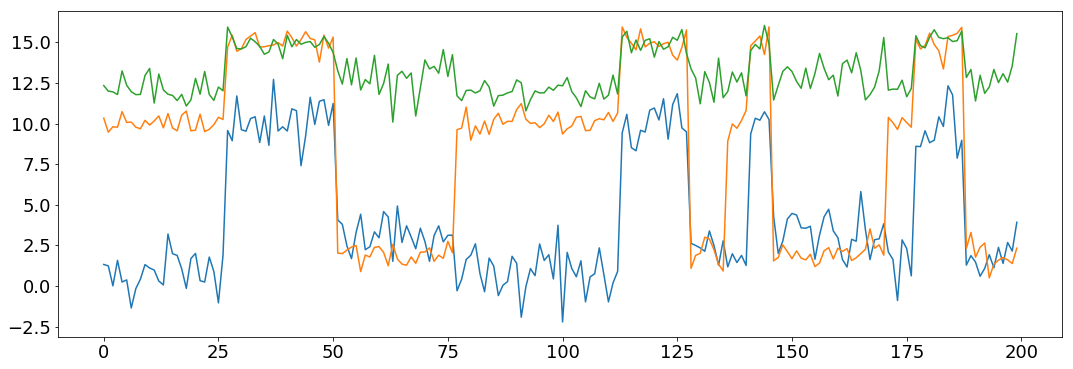

In [168]:
t = model.sample(length=200)
plt.plot(t)

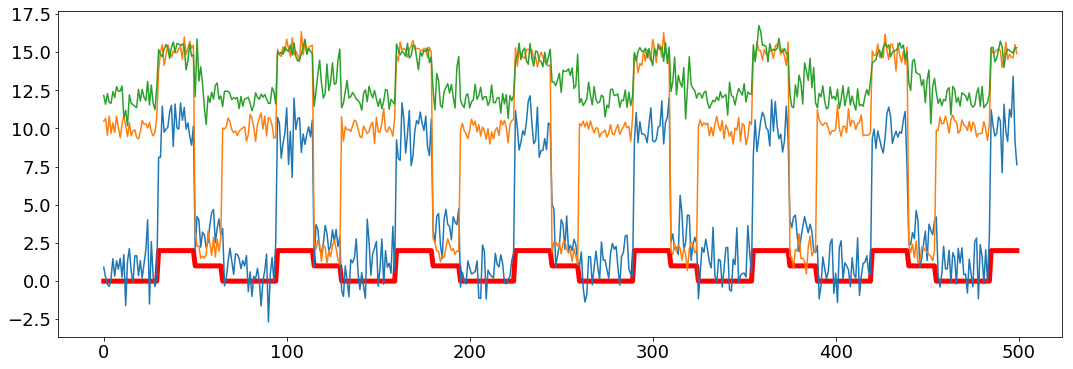

In [169]:
# plt.plot(arr)
label = [x[0] for x in model.viterbi(signal)[1]][1:]
plt.plot(label,'r',linewidth=5)
plt.plot(signal)

In [170]:
anomal[0]

[0.5419062436665047, 10.497877135660287, 11.72614814724259]

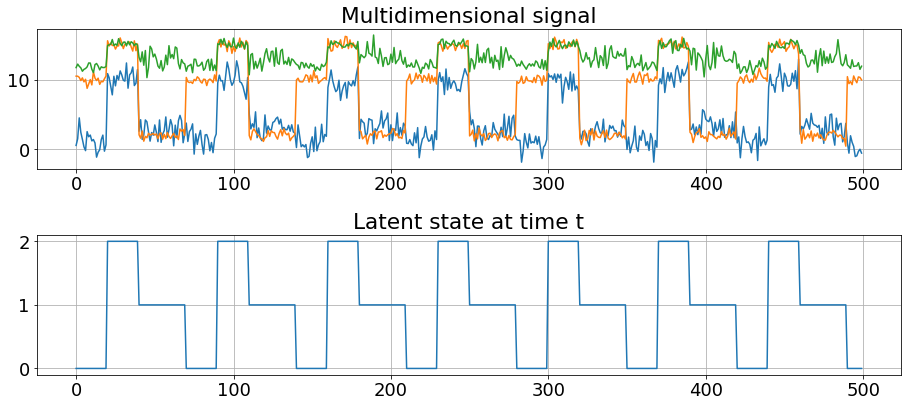

In [171]:
# plt.plot(arr)
label = [x[0] for x in model.viterbi(anomal)[1]][1:]
fig, ax = plt.subplots(2,1,figsize =(13,6))
ax[0].set_title('Multidimensional signal')
ax[0].plot(anomal)
ax[0].grid()

ax[1].set_title('Latent state at time t')
ax[1].plot(label)
ax[1].grid()
plt.tight_layout()

plt.savefig('stage.png')

In [172]:
model.viterbi(anomal)

(-1773.5453318479413, [(3, {
       "class" : "State",
       "distribution" : null,
       "name" : "None-start",
       "weight" : 1.0
   }), (0, {
       "class" : "State",
       "distribution" : {
           "class" : "Distribution",
           "name" : "MultivariateGaussianDistribution",
           "parameters" : [
               [
                   0.9154844961284246,
                   10.049856880990168,
                   11.978829950288588
               ],
               [
                   [
                       1.4323059649046217,
                       -0.06543163521917181,
                       0.05845406184316511
                   ],
                   [
                       -0.06543163521917181,
                       0.2239636780826449,
                       0.0074928416136436065
                   ],
                   [
                       0.05845406184316511,
                       0.0074928416136436065,
                       0.24603138640580835
     

In [59]:
print(model.log_probability(signal))
print(model.log_probability(anomal))

581.9835049379499
-24879.57575905361


In [34]:
def anomal_probability(model, sequence_states):
    #индек состояния в матрице и состояний в последовательности состояний
    n = model.node_count() - 2
    print('Кол. состояний ', n)
    p = 1
    A = model.dense_transition_matrix()
    for i_pred, i_cur in zip(sequence_states,sequence_states[1:]):
        p *=A[i_pred, i_cur]
    print(p)
    return p

In [35]:
temp = [0,0,0,1,1,2,2,2,1,]
anomal_probability(model, temp)

Кол. состояний  3
0.0


0.0

In [36]:
label = [0,1,2,3,4,5,6,7,8,9,10,11]
for i_pred, i_cur in zip(label,label[1:]): 
    print(i_pred, i_cur)

0 1
1 2
2 3
3 4
4 5
5 6
6 7
7 8
8 9
9 10
10 11


In [37]:
model.dense_transition_matrix()

array([[0.95      , 0.        , 0.05      , 0.        , 0.        ],
       [0.03082192, 0.96917808, 0.        , 0.        , 0.        ],
       [0.        , 0.33333333, 0.66666667, 0.        , 0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ]])

In [38]:
model.dense_transition_matrix()[:3,:3]

array([[0.95      , 0.        , 0.05      ],
       [0.03082192, 0.96917808, 0.        ],
       [0.        , 0.33333333, 0.66666667]])